# Вариант 15

In [649]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [650]:
N = 6
M = 100  # шаги по x
T = 1
L = 1  # граница по x
a = 0.01

h = L / M
tau = T / N
t = N * tau
x = M * h

X_l = np.linspace(0, L, M)
T_l = np.linspace(0, T, N)

In [651]:
a * tau / h

0.16666666666666666

# P1

In [652]:
def gamma_0(t):
    return 0

def gamma_1(t):
    return 0

In [653]:
def phi(x, t):
    return x ** 2 * (1 - x)

def psi(x):
    return x * (x ** 2 - x)

## T1

$$
\dfrac{u_i^{j + 1} - u_i^j}{\tau} = a^2 \cdot \dfrac{u^j_{i+1} + 1 - 2u^j_{i} + u^j_{i-1} - 1}{h^2} + \phi(x, t)
$$

$$
u_i^{j + 1} = \tau\left(a^2 \cdot \dfrac{u^j_{i+1} + 1 - 2u^j_{i} + u^j_{i-1} - 1}{h^2} + \phi(x, t)\right) + u_i^j
$$

In [654]:
U = np.zeros((N, M))

In [655]:
def u_0(psi):
    return psi(X_l)

def u_j1(u_im, u_i, u_ip, x, t):
    aboba = phi(x, t)
    return tau * ((a ** 2 / h ** 2)*(u_ip + 1 - 2 * u_i + u_im - 1) + aboba) + u_i



In [656]:
U[0] = u_0(psi)

In [657]:
for index in range(N):
    U[index][0] = gamma_0(T_l[index])
    U[index][-1] = gamma_1(T_l[index])

In [658]:
for t_index in range(1, N):
    for l_index in range(1, M - 1):
        u_im, u_i, u_ip = U[t_index - 1][l_index - 1 : l_index + 1 + 1]
        U[t_index][l_index] = u_j1(u_im, u_i, u_ip, X_l[l_index], T_l[t_index - 1])

<Axes: >

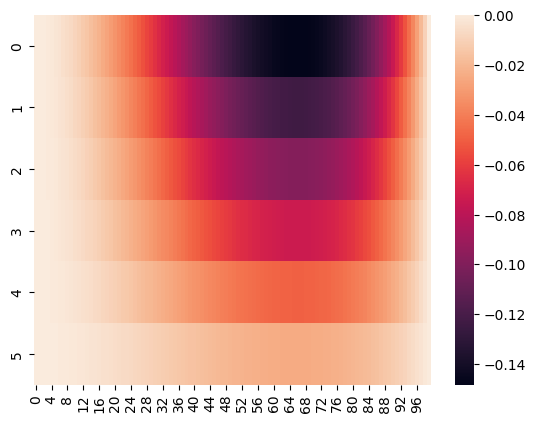

In [659]:
sns.heatmap(U)

## T2
$$
\dfrac{u_i^{j+1} - u_i^j}{\tau} = a^2\dfrac{u^{j+1}_{i + 1} - 2u_{i}^{j+1} + u_{i - 1}^{j+1}}{h^2} + \phi(x, t)
$$

$$
h^2 \cdot u_i^{j + 1} + \left(- u^{j + 1}_{i + 1} + 2u^{j + 1}_i -u^{j + 1}_{i - 1} \right) \cdot \tau a^2 = u^{j}_{i} \cdot h^2 + \phi(x, t)\cdot h^2 \cdot \tau
$$

In [660]:
U = np.zeros((N, M))

In [661]:
U[0] = u_0(psi)


In [662]:
for index in range(N):
    U[index][0] = gamma_0(T_l[index])
    U[index][-1] = gamma_1(T_l[index])

In [663]:
def gen_Y(size, c1, c2, c3):
    Y = np.zeros((size, size))
    Y[0][1] = c3
    Y[-1][-2] = c1
    np.fill_diagonal(Y, c2)
    for row in range(1, size - 1):
        Y[row][row - 1] = c1
        Y[row][row + 1] = c3
    return Y

In [664]:
for t_index in range(1, N):
    b = np.zeros(M - 2)
    for l_index in range(1, M - 1):
        b[l_index - 1] = (
            U[t_index - 1][l_index] * h**2
            + phi(X_l[l_index], T_l[t_index - 1]) * h**2 * tau
        )
    Y = gen_Y(M - 2, -1 * tau * a**2, h**2 + 2 * tau * a**2, -1 * tau * a**2)

    U[t_index][1:-1] = np.linalg.solve(Y, b)

<Axes: >

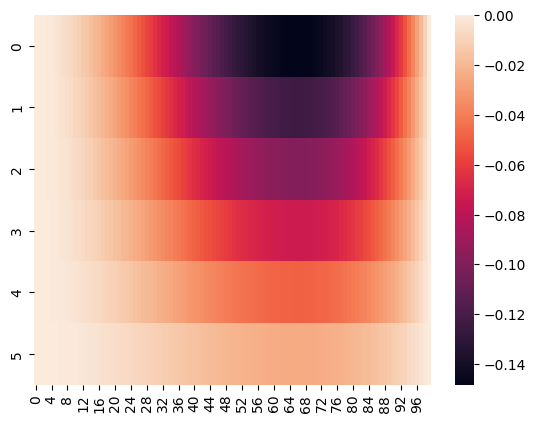

In [665]:
sns.heatmap(U)

# P2

In [666]:
def gamma_0(t):
    return t * (t + 1)
def gamma_1(t):
    return 3 * t ** 2

def phi(x, t):
    return 0

def psi(x):
    return 0

In [667]:
def gamma_0(t):
    return t
def gamma_1(t):
    return -t ** 2 * (1 + t)

## T1

In [685]:
def u_0(psi):
    return psi(X_l)

def u_j1(u_im, u_i, u_ip, x, t):
    aboba = phi(x, t)
    return tau * ((a ** 2 / h ** 2)*(u_ip - 2 * u_i + u_im) + aboba) + u_i



In [686]:
U = np.zeros((N, M))
U[0] = u_0(psi)

In [687]:
for index in range(N):
    U[index][0] = gamma_0(T_l[index])
    U[index][-1] = gamma_1(T_l[index])

In [688]:
for t_index in range(1, N):
    for l_index in range(1, M - 1):
        u_im, u_i, u_ip = U[t_index - 1][l_index - 1 : l_index + 1 + 1]
        U[t_index][l_index] = u_j1(u_im, u_i, u_ip, X_l[l_index], T_l[t_index - 1])


In [689]:
U

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+0

In [693]:
U[2][-1]

np.float64(-0.22400000000000003)

<Axes: >

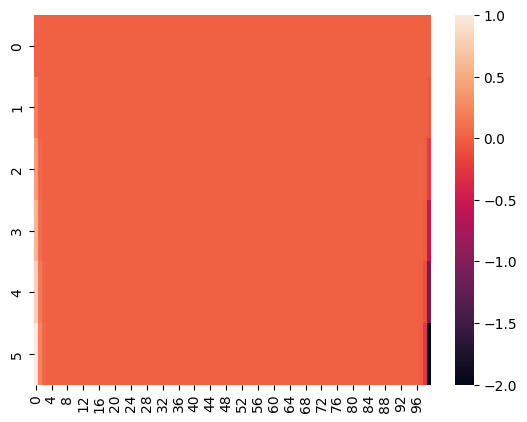

In [674]:
sns.heatmap(U)

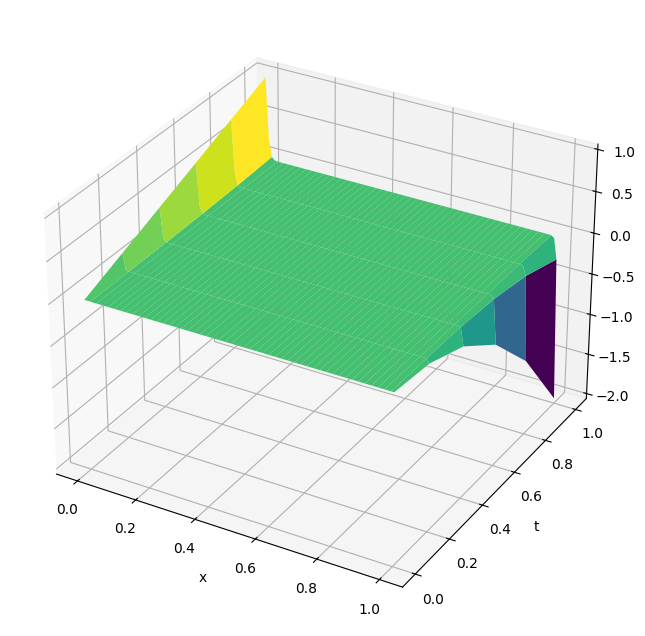

In [675]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X_g, T_g = np.meshgrid(X_l, T_l)

ax.plot_surface(X_g, T_g, U, cmap='viridis')

ax.set_xlabel('x')
ax.set_ylabel('t')

plt.show()


## T2

In [676]:
U = np.zeros((N, M))
U[0] = u_0(psi)

In [677]:
for index in range(N):
    U[index][0] = gamma_0(T_l[index])
    U[index][-1] = gamma_1(T_l[index])


In [678]:
def gen_Y(size, c1, c2, c3):
    Y = np.zeros((size, size))
    Y[0][1] = c3
    Y[-1][-2] = c1
    np.fill_diagonal(Y, c2)
    for row in range(1, size - 1):
        Y[row][row - 1] = c1
        Y[row][row + 1] = c3
    return Y


In [679]:
for t_index in range(1, N):
    b = np.zeros(M - 2)
    for l_index in range(1, M - 1):
        b[l_index - 1] = (
            U[t_index - 1][l_index] * h**2
            + phi(X_l[l_index], T_l[t_index - 1]) * h**2 * tau
        )
    Y = gen_Y(M - 2, -1 * tau * a**2, h**2 + 2 * tau * a**2, -1 * tau * a**2)

    U[t_index][1:-1] = np.linalg.solve(Y, b)


<Axes: >

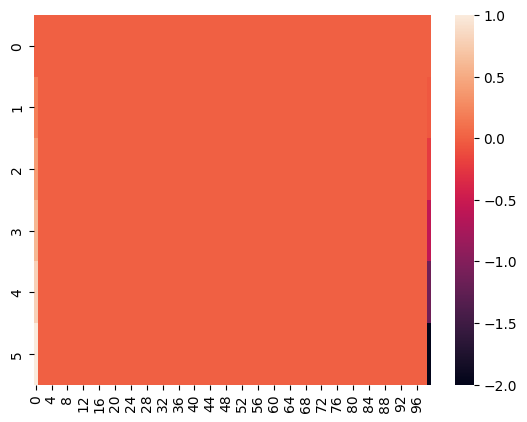

In [680]:
sns.heatmap(U)